<a href="https://colab.research.google.com/github/jcgalvisa/NA/blob/main/EcuacionesNoLineales/EcuacionesNoLinealesAN2022I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from numpy.linalg import norm

# Bisección

Presentaremos una implementación del pseudocódigo de bisección en el texto guía.  En particular resolvemos la ecuación $\exp(x)-\sin(x)=0$

In [ ]:
def mifun(x):
  y=np.exp(x)-np.sin(x)
  return y

Podemos hacer una gráfica para tener una idea de los parámetros del método de bisección. 

In [ ]:
def animacion_intervalo(a,e):
  
  x = np.arange(a, a+e, e/1000)
  y= mifun(x)
  plt.figure(figsize=(10, 5))
  plt.plot(x, y*0, 'b--',label='Funcion')
  plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
  plt.grid(color='g', linestyle='--', linewidth=.5)
  plt.show()
  

wd= interactive(animacion_intervalo, a=(-10, 10, .1), e=(0.1,10,.1))

wd

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0), FloatSlider(value=5.0, des…

En este caso observamos que para calcular la raíz de la derecha podemos usar $[-4,-3]$. Tenemos el siguiente script para general la gráfica.

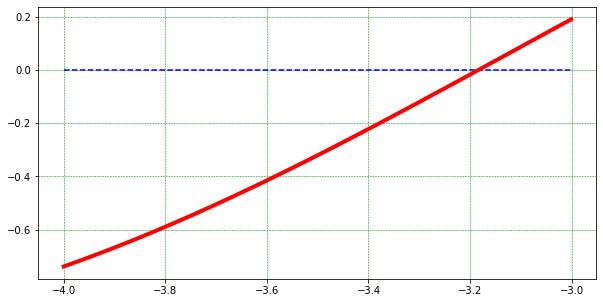

In [ ]:
a,b=-4,-3
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

El siguiente script implementa el método de bisección para la función arriba usando como datos de entrada $[-4,-3]$, con una tolerancia a la longitud del intervalo y al valor absoluto del residuo de $10^{-8}$.

In [ ]:
a,b,M,delb,epsb=-4,-3,100,1E-8,1E-8
print(a,b,M,delb,epsb)
u=mifun(a)
v=mifun(b)
e=b-a
if np.sign(u)!=np.sign(v):
  for k in range(1,M):
    e=e/2
    c=a+e
    w=mifun(c)
    print('c={0:.15f}'.format(c))
    if np.abs(e)<delb or np.abs(w)<epsb :
      break
    else:
      if np.sign(w)!=np.sign(u):
        b=c
        v=w
      else:
        a=c
        u=w
print(k,w,e)

-4 -3 100 1e-08 1e-08
c=-3.500000000000000
c=-3.250000000000000
c=-3.125000000000000
c=-3.187500000000000
c=-3.156250000000000
c=-3.171875000000000
c=-3.179687500000000
c=-3.183593750000000
c=-3.181640625000000
c=-3.182617187500000
c=-3.183105468750000
c=-3.182861328125000
c=-3.182983398437500
c=-3.183044433593750
c=-3.183074951171875
c=-3.183059692382812
c=-3.183067321777344
c=-3.183063507080078
c=-3.183061599731445
c=-3.183062553405762
c=-3.183063030242920
c=-3.183062791824341
c=-3.183062911033630
c=-3.183062970638275
c=-3.183063000440598
c=-3.183063015341759
26 -3.546771550066996e-09 1.4901161193847656e-08


Observamos que en la iteración 26 el programa termina con la aproximación $-3.183063015341759$ con longitud del intervalo $|e|\approx 1.5\times 10^{-8}$ y con un residuo de $|w|\approx 3.5\times 10^{-9}$.

# Newton

En esta sección implementamos el método de newton. Esta vez crearemos una función con el método Newton que reciba los parámetros adecuados e imprima el valor de la aproximación. Otras cantidades pueden ser también incluidas en los parámetros de salida como el residuo y el número de iteraciones, o alternativamente pueden ser impresas dentro de la función.  Tenemos la siguiente función.

In [ ]:
def minewton(f,fp,x0,myeps,mydel,max_iter):
    '''f(x)=0 unando newton xn=xa-f(xa)/fp(xa)
    ----------
    f : funnción
    fp : Derivada
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    M : Número maximo de iteraciones
    ----------
    '''
    x = x0
    for n in range(0,max_iter):
        fx = f(x)
        if abs(fx) < myeps:
            print('residuo f(x(',n,'))=',fx)
            return x
        fpx = fp(x)
        if fpx == 0:
            print('Derivada nula. Error!')
            return None
        x = x - fx/fpx
        print( 'x(',n,')=',x)
        if abs(x-x0) < mydel:
            print('incremento delta(',n,')=',fx)
            return x
        x0=x
    print('Número maximo de iteraciones')
    return None


Usemos la función ateriore para resolver la ecuaciones $\exp(x)-\sin(x)$

In [ ]:
f = lambda x: np.exp(x)-np.sin(x)
fp = lambda x: np.exp(x)-np.cos(x)
approx = minewton(f,fp,1,1e-10,1e-10,10)

x( 0 )= 0.13827893045637507
x( 1 )= -6.263457215119403
x( 2 )= -6.281316869638125
x( 3 )= -6.2813143662108075
residuo f(x( 4 ))= 1.2010791666794418e-14


Podemos usar la siguiente animación para explorar las dos primeras iteraciones de Newton. En particular intente inciar con $x_0\approx-5.12$.

In [ ]:
def animacion_intervalo(x0):
  
  x = np.arange(-10, 2, 0.1)
  y0= np.exp(x0)-np.sin(x0)
  y0p=np.exp(x0)-np.cos(x0)
  y= np.exp(x)-np.sin(x)
  L0=y0+y0p*(x-x0);
  x1=x0-y0/y0p;
  y1=np.exp(x1)-np.sin(x1)
  y1p=np.exp(x1)-np.cos(x1)
  L1=y1+y1p*(x-x1);
  x2=x1-y1/y1p;
  y2=np.exp(x2)-np.sin(x2)


  plt.figure(figsize=(15, 5))
  plt.plot(x, y, 'b--')
  plt.plot(x, 0*y, 'k')
  plt.plot(x0,0,color='g',marker='.',markersize=10, label='x_0')
  plt.plot(x, L0, 'g-',linewidth=1, label='Tangente en x_0')
  plt.plot(x0,y0,color='g',marker='.',markersize=10)
  plt.plot(x1,0,color='m',marker='.',markersize=10, label='x_1')
  plt.plot(x, L1, 'm-',linewidth=1,label='Tangente en x_1')
  plt.plot(x1,y1,color='m',marker='.',markersize=10)
  plt.plot(x2,0,color='c',marker='.',markersize=10, label='x_2')

  plt.grid(color='g', linestyle='--', linewidth=.5)
  plt.xlim(-10,-0)
  plt.ylim(-2, 4)
  plt.legend()
  plt.show()
  

wd= interactive(animacion_intervalo, x0=(-6, -2, .01))

wd

interactive(children=(FloatSlider(value=-4.0, description='x0', max=-2.0, min=-6.0, step=0.01), Output()), _do…

En este caso $x_0$ corresponde al punto magenta, 
$x_1$ al unto verde y $x_2$ al punto azul claro. 

# Punto Fijo


In [ ]:
def miFpf(x):
  y=x+np.exp(x)-np.sin(x)
  return y

In [ ]:
x0=-4
for n in range(1,10):
  x1=miFpf(x0)
  x0=x1
  print('x={0:.15f}'.format(x1))

x=-4.738486856419194
x=-5.729394447160081
x=-6.252060669705465
x=-6.281253801923153
x=-6.281314252785754
x=-6.281314365998385
x=-6.281314366210397
x=-6.281314366210795
x=-6.281314366210796


Observe que existen varias formas de trasformar $f(x)=0$ en una iteración de punto fijo $F(x)=x$.  Presentamos una illustración simple de la iteración. Ver tambien https://www.geogebra.org/m/qUbg7Z6W

[0.4472136  0.6687403  0.81776543 0.90430384 0.95094892 0.9751661
 0.98750499 0.99373285 0.9968615  0.99842952 0.99921445 0.99960715
 0.99980355 0.99990177 0.99995089 0.99997544 0.99998772 0.99999386
 0.99999693 0.99999847 0.99999923]
21


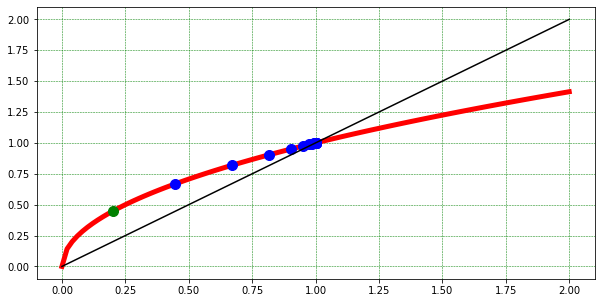

In [ ]:
def mif(x):
  y=np.sqrt(x)
  return y
tol,M,x0,difnorm,iter,xp= 1E-6,300,.2,1,0,[]
xini=x0

while(difnorm > tol and iter <  M):
  x1 = mif(x0)      
  difnorm = norm(x0-x1) 
  x0 = x1
  xp=np.append(xp,x1)  # save the solution of the current step
  iter = iter + 1



print(xp)
print(iter)
x = np.linspace(0,2,100)
y = mif(x)
plt.figure(figsize=(10, 5))
plt.plot(x,y,'r',linewidth=5)
plt.plot(xp,mif(xp),'bo',markersize=10)
plt.plot(x,x,'k')
plt.plot(xini,mif(xini),'.g',markersize=20)
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

# Librerias

Usamos la librería scipy.optimize.fsolve para resolver una ecuacion. Para informacion adicional puede consultar https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve

In [ ]:
from scipy.optimize import fsolve

def myfun2(x):
   y = np.exp(x)-np.sin(x)
   print(x,'\t\t',y)
   return y

z = fsolve(myfun2,-3)
print(z)
print(myfun2(z))

[-3] 		 [0.19090708]
[-3.] 		 [0.19090708]
[-3.] 		 [0.19090708]
[-2.99999996] 		 [0.19090712]
[-3.18360341] 		 [-0.00056233]
[-3.18306419] 		 [-1.22193941e-06]
[-3.18306301] 		 [2.63640845e-11]
[-3.18306301] 		 [2.15105711e-16]
[-3.18306301]
[-3.18306301] 		 [2.15105711e-16]
[2.15105711e-16]


Obtenemos la raiz $r\approx-3.18306301$ con un residuo $\approx 2\times 10^{-16}$. Usemos ahora scipy para resolver un sistema de tres ecuaciones con tres incognitas. Agregamos print dentro de la función para imprimir los iterados. 

In [ ]:
def myFvec(x):
  y = np.empty((3))
  y[0]=x[0]*x[1]-x[2]**2
  y[1]=x[0]*x[1]*x[2]-x[0]**2+x[1]**2
  y[2]=np.exp(x[0])-np.exp(y[1])+x[2]-3
  print(x)
  return y

x0 = np.array([0,1,0])
r = fsolve(myFvec,x0)
print(r)

[0 1 0]
[0. 1. 0.]
[0. 1. 0.]
[1.49011612e-08 1.00000000e+00 0.00000000e+00]
[0.         1.00000001 0.        ]
[0.00000000e+00 1.00000000e+00 1.49011612e-08]
[2.98023206e-08 5.00000004e-01 1.99999989e+00]
[2.15224589 0.63095647 0.40336098]
[0.70471843 0.75002461 1.92043266]
[1.71223427 0.71676582 0.90555853]
[1.28040009 0.89465479 0.62982444]
[1.12818885 0.84469574 0.83379873]
[1.04078636 0.70022687 0.85312251]
[1.1672988  0.71334999 0.97766916]
[1.11339844 0.73465633 0.87826283]
[1.12912734 0.72850593 0.90563147]
[1.12929794 0.72788239 0.9068089 ]
[1.12925282 0.72794401 0.90666318]
[1.12925139 0.727945   0.90666039]
[1.12925132 0.72794503 0.9066603 ]
[1.12925132 0.72794503 0.90666029]
[1.12925132 0.72794503 0.90666029]


# Problemas


**Problema (Kelley)** Considere el método de Shamanskii de orden $m$ definido de la siguiente manera. Dado $x_n$ calcule $x_{n+1}$ usando $m$ pasos del método de la cuerda, esto es, 

$z_1=x_n-f(x_n)/f'(x_n)$

$z_{j+1}=z_{j}-f(z_j)/f'(x_n)$, $1\leq j\leq m-1$

$x_{n+1}=z_{m}$.

Observe que se avanza m pasos sin actualiar la derivada en el punto. Implemente el método para un order $m$ definido por el usuario y verifique su código con una ecuación escalar. 

**Problema (Kelley, Iterative methodos for linear and non linear equations)** Resuelva las siguientes ecuaiones $f(x)=0$ usando el Método de newton, el método de la secante (para este inicie la iteración en $x_{-1}$ con $x_{-1}=0.99x_0$) y el método de Shamanskii con $m=2,3,4$. Comente los resultados. Puede hacer tablas o plots con las iteraciones.


1.   $f(x)=\cos(x)-x$,  $\quad x_0=.5$.
2.   $f(x)=\arctan(x)$,  $\quad x_0=1$.
3.   $f(x)=\sin(x)$, $\quad  x_0=3$.
4.   $f(x)=x^2$,  $\quad  x_0=.5$.
5.   $f(x)=x^2+1$,  $\quad  x_0=10$.



**Problema(Quarteroni, Saleri, Gervasio)** Considere un plano cuya pendiente varía con tasa constante $\omega$ y un punto de masa quieto en el tiempo $t=0$. En el tiempo $t>0$ su posición es dada por
$$s(t,\omega)= \frac{g}{2\omega^2}\Big[ \sinh(\omega t)-\sin(\omega t) \Big] $$
donde $g=9.8 \frac{m}{s^2}$. Suponga que el objeto se ha movido 1 metro en un segundo, calcule el valor correspondiente de $\omega$ con 12 decimales exactos. 

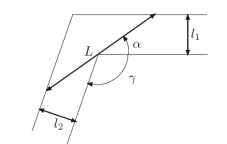

**Problema (Quarteroni, Saleri, Gervasio)** La longitud maxima de una varilla que se puede arrastrar de un extremo a otro deslizandola por un pasillo como el de la fiugra es 
$$L=\frac{l_2}{\sin(\pi-\gamma-\alpha)}+\frac{l_1}{\sin(\alpha)}$$
donde $\alpha$ es la solución de la ecuación
$$ l_2 \frac{\cos(\pi-\gamma-\alpha)}{\sin^2(\pi-\gamma-\alpha)}-l_1\frac{\cos(\alpha)}{\sin^2(\alpha)}=0.$$
Calcule $\alpha$ cuando $l_2=10$, $l_1=8$ y $\gamma=\frac{3\pi}{5}$. ¿Cuántos decimales puede garantizar para $\alpha$ y $L$?

**Problema** Selecciones dos de los métodos en https://docs.scipy.org/doc/scipy-0.13.0/reference/optimize.html en la sección Root finding, diga cual es el método numerico implementado (e.g, similar a newton, usa derivadas, no usa derivadas, combina varios métodos, llama alguna otra subrutina conocida encontrada en netlib, cuales son las toleracias por defecto, etc)  y para cada uno de los métodos seleccionados implementar un ejemplo numérico con una ecuación escalar o una ecuación vectorial según sea el caso. Imprima la solución calculada asi como alguna informacion adicional (residuo, cantidad de iteraciones, etc). 

Si usa MatLab seleccione dos de entre los métodos como fsolve, froot, fzero, roots, o similares (https://la.mathworks.com/help/optim/systems-of-nonlinear-equations.html). Análogamente para octave (https://octave.org/doc/v4.2.0/Solvers.html), julia, etc.

# Referencias




*   Sullivan, Eric. Numerical Methods: An Inquiry-Based Approach With Python. 2020.
*   Bulirsch, Roland, Josef Stoer, and J. Stoer. Introduction to numerical analysis. Vol. 3. Heidelberg: Springer, 2002.
*  Stewart, Gilbert W. Afternotes on numerical analysis. Society for Industrial and Applied Mathematics, 1996.
*  Quarteroni, Alfio, Fausto Saleri, and Paola Gervasio. Scientific computing with MATLAB and Octave. Vol. 3. Berlin: Springer, 2006.


